# FL Model 
## Plots 

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats
import scipy

In [2]:
ds = xr.open_dataset('/home/lumbraca/raster/data/fl_model_cleandata_create_netcdf.nc')
ds

<xarray.Dataset>
Dimensions:        (y: 7483, x: 7297, band: 1)
Coordinates:
  * y              (y) float64 8.125e+05 8.125e+05 8.124e+05 ... 7.9e+05 7.9e+05
  * x              (x) float64 1.487e+06 1.487e+06 ... 1.509e+06 1.509e+06
  * band           (band) int32 1
    spatial_ref    int32 ...
Data variables: (12/24)
    snowdepth      (band, y, x) float32 ...
    dtm_snowoff    (band, y, x) float32 ...
    dsm_snowoff    (band, y, x) float32 ...
    dtm_snowon     (band, y, x) float32 ...
    dsm_snowon     (band, y, x) float32 ...
    aspect         (band, y, x) float32 ...
    ...             ...
    dce_reclass    (band, y, x) float32 ...
    largeclusters  (band, y, x) float32 ...
    smallclusters  (band, y, x) float32 ...
    canopyedges    (band, y, x) float32 ...
    smallgaps      (band, y, x) float32 ...
    largegaps      (band, y, x) float32 ...

In [3]:
# flatten everything to save time later
# canopy parameters
chm_snowoff_flat=ds.chm_snowoff.values.flatten()
chmws_flat=ds.chmws.values.flatten()
chmas_flat=ds.chmas.values.flatten()
dce_flat=ds.dce.values.flatten()
dce_reclass_flat=ds.dce_reclass.values.flatten()

# else 
slope_flat=ds.slope.values.flatten()
aspect_flat=ds.aspect.values.flatten()
dah_flat=ds.dah.values.flatten()
dah_reclass_flat=ds.dah_reclass.values.flatten()

snowdepth_flat=ds.snowdepth.values.flatten()
dem_flat=ds.dem.values.flatten()
tpi_flat=ds.tpi.values.flatten()

# I did not make these in the netcdf model script 
# dce_dahpos_reclass_flat=ds.dce_dahpos_reclass.values.flatten()
# dce_dahneg_reclass_flat=ds.dce_dahneg_reclass.values.flatten()

# Now, plot. 

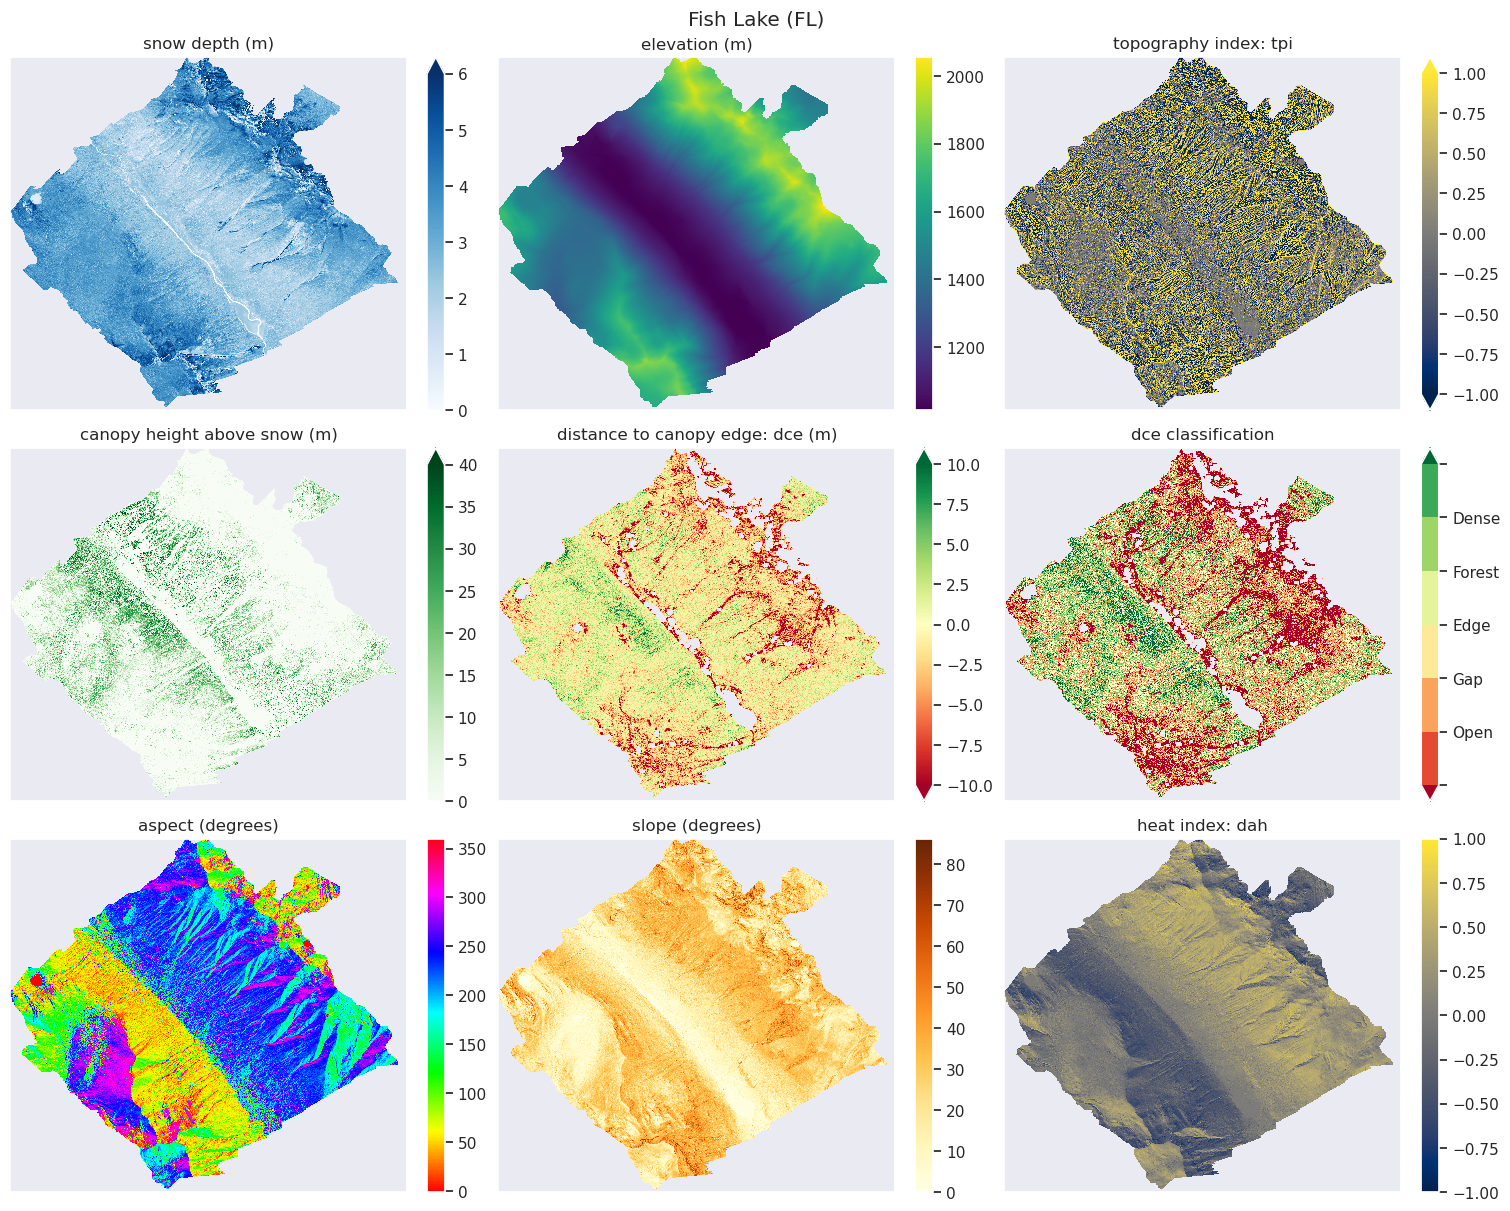

In [8]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,12), constrained_layout = True)
    # gridspec_kw={'height_ratios': [1, 1, 2, 1, 2, 2, 2]})

fig.suptitle('Fish Lake (FL)')


# row 1 with snow depth and dem
ds.snowdepth.plot(ax=axes[0,0], cmap='Blues', vmin=0, vmax=6, cbar_kwargs={'label':''})
ds.dem.plot(ax=axes[0,1], cmap='viridis', cbar_kwargs={'label':''})
ds.tpi.plot(ax=axes[0,2], cmap='cividis', vmin=-1, vmax=1, cbar_kwargs={'label':''})

axes[0,0].set_title('snow depth (m)')
axes[0,1].set_title('elevation (m)')
axes[0,2].set_title('topography index: tpi')

# row 2 with canopy 
ds.chmas.plot(ax=axes[1,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) # canopy height model above snow 
ds.dce.plot(ax=axes[1,1], cmap='RdYlGn', vmin=-10, vmax=10, cbar_kwargs={'label':''})
# ds.dce_reclass.plot(ax=axes[1,2], cmap='RdYlGn', cbar_kwargs={'label':''}) # use this is not discrete colorbar used below

# discrete colormap for classifications -------------------------------
cmap = mpl.cm.RdYlGn
norm = mpl.colors.BoundaryNorm([0, 100,200,300,400,500, 600], cmap.N, extend='both')
# norm = mpl.colors.BoundaryNorm([100,200,300,400,500], cmap.N, extend='both')

ds.dce_reclass.plot(ax=axes[1,2], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn'), ax=axes[1,2])
# cbar.ax.set_yticklabels(['Open', 'Gap', 'Edge', 'Forest', 'Dense'])
cbar.ax.set_yticklabels(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', ''])

# done -----------------------------------------------------------------

axes[1,0].set_title('canopy height above snow (m)')
axes[1,1].set_title('distance to canopy edge: dce (m)')
axes[1,2].set_title('dce classification')

# row 3 with slope aspect dah
ds.aspect.plot(ax=axes[2,0], cmap='hsv', vmin=-1, vmax=360, cbar_kwargs={'label':''})
ds.slope.plot(ax=axes[2,1], cmap='YlOrBr', cbar_kwargs={'label':''})
ds.dah.plot(ax=axes[2,2], cmap='cividis', vmin=-1, vmax=1, cbar_kwargs={'label':''})
                       
axes[2,0].set_title('aspect (degrees)')
axes[2,1].set_title('slope (degrees)')
axes[2,2].set_title('heat index: dah')


# fix all labels and ticks 
# for ax in axes: # this loop is not working for some reason 
#     ax.xlabel('')

# row 1 
axes[0,0].set_xlabel(''); axes[0,0].set_ylabel(''); axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel(''); axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[0,2].set_xlabel(''); axes[0,2].set_ylabel(''); axes[0,2].set_xticks([]); axes[0,2].set_yticks([])

# row 2
axes[1,0].set_xlabel(''); axes[1,0].set_ylabel(''); axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel(''); axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[1,2].set_xlabel(''); axes[1,2].set_ylabel(''); axes[1,2].set_xticks([]); axes[1,2].set_yticks([])

# row 3 
axes[2,0].set_xlabel(''); axes[2,0].set_ylabel(''); axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
axes[2,1].set_xlabel(''); axes[2,1].set_ylabel(''); axes[2,1].set_xticks([]); axes[2,1].set_yticks([])
axes[2,2].set_xlabel(''); axes[2,2].set_ylabel(''); axes[2,2].set_xticks([]); axes[2,2].set_yticks([])

plt.show()

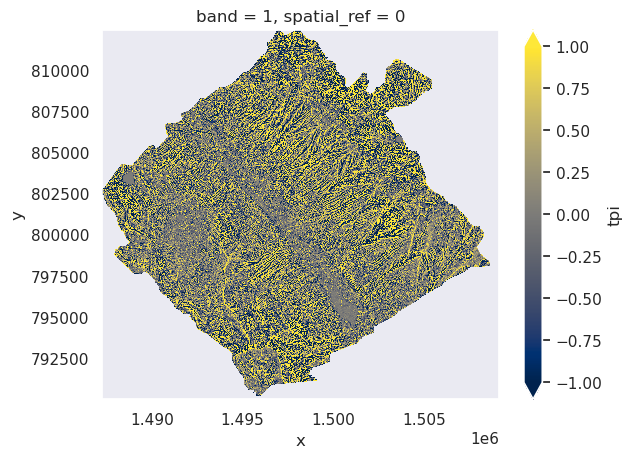

In [4]:
ds.tpi.plot(cmap='cividis', vmin=-1, vmax=1)

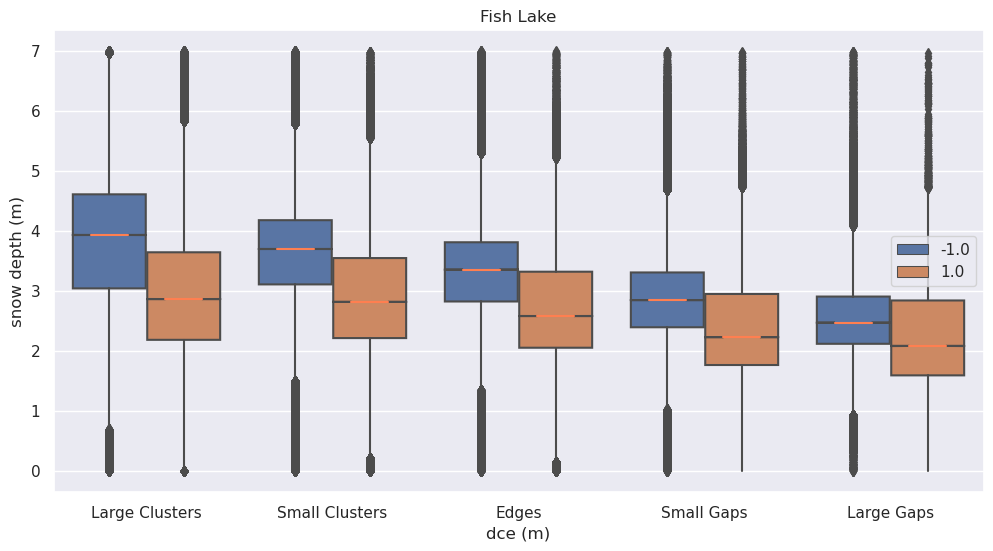

: 

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x=dce_reclass_flat, y=snowdepth_flat, hue=dah_reclass_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel('dce (m)')
plt.ylabel('snow depth (m)')
plt.title('Fish Lake')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

alpha = 0.5

fig.suptitle('Fish Lake')

sns.histplot(ax=axes[0], data=snowdepth_flat, label='snow depth', color='blue', alpha=alpha, binwidth=0.2, kde=False) # bin 20 cm? 
sns.histplot(ax=axes[1], data=dce_flat,       label='dce', color='green', alpha=alpha, binwidth=1, kde=False) # bin 1 meter? 
sns.histplot(ax=axes[2], data=dah_flat,       label='dah', color='grey', alpha=alpha, binwidth=.05, kde=False) # bin 1 meter? 

axes[0].set_xlim([0,8])
axes[1].set_xlim([-20,20])
axes[2].set_xlim([-1,1])

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('dce (m)')
axes[2].set_xlabel('dah')

plt.show()

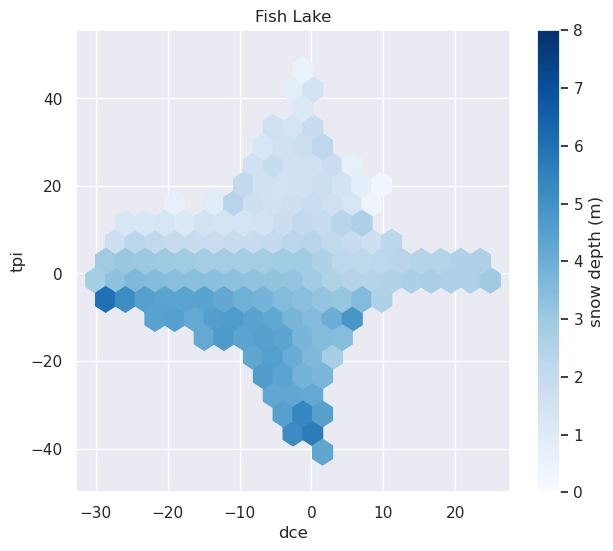

In [5]:
plt.figure(figsize=(7,6))

plt.hexbin(dce_flat, tpi_flat, C=snowdepth_flat, cmap='Blues', vmin=0, vmax=8,
          gridsize=20, mincnt=2)

cb = plt.colorbar()
cb.set_label('snow depth (m)')

plt.xlabel('dce')
plt.ylabel('tpi')
# plt.xlim([-20,20])
# plt.ylim([-1,1])

plt.title('Fish Lake')
plt.show()

## Tidy Matrix for Stats

In [6]:
# create df 
df = pd.DataFrame({'snowdepth': snowdepth_flat,
                   'dem': dem_flat, 
                   'dah': dah_flat, 
                   'tpi': tpi_flat, 
                   'dce': dce_flat})

# random forest cannot have any na values
# df.snowdepth.dropna(inplace=True)
# df.dropna(how='any', inplace=True) # it has to be everything 

df

,snowdepth,dem,dah,tpi,dce
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
54603446,NaN,NaN,NaN,NaN,NaN
54603447,NaN,NaN,NaN,NaN,NaN
54603448,NaN,NaN,NaN,NaN,NaN
54603449,NaN,NaN,NaN,NaN,NaN


## Elevation

Text(0.5, 0, 'elevation (m)')

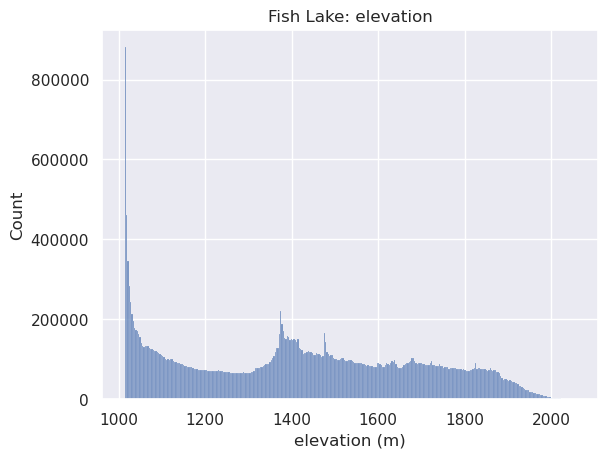

In [7]:
sns.histplot(data=dem_flat)
plt.title('Fish Lake: elevation')
plt.xlabel('elevation (m)')